In [1]:
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn import tree


In [7]:
def get_datasets():
    # My python only likes absolute paths 
    brca = pd.read_csv('C:\\Users\\sohai\\PycharmProjects\\comp3212-cancer-exploration\\data\\Gistic2_CopyNumber_BRCA', sep='\t')
    ovca = pd.read_csv('C:\\Users\sohai\\PycharmProjects\\comp3212-cancer-exploration\\data\\Gistic2_CopyNumber_OVCA', sep='\t')
    brca.set_index('Gene Symbol', inplace=True)
    ovca.set_index('Gene Symbol', inplace=True)
    brca = brca.transpose()
    ovca = ovca.transpose()
    brca['BRCA'] = 1
    ovca['BRCA'] = 0
    df = pd.concat([brca, ovca[1:]])
    print(len(df), len(brca.transpose()-2) + len(ovca.transpose()-2))
    return df
df = get_datasets()

1658 49554


In [8]:
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [9]:
y = df["BRCA"]
X = df[df.columns[:-1]]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [27]:
# Hyper parameter tuning 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


param_dist = {"max_depth": [3,None],
             "min_samples_leaf": randint(1,9),
             "criterion": ["gini","entropy"],
             }

t = tree.DecisionTreeClassifier()
# Cross validation is at 5 now
tree_cv = RandomizedSearchCV(t,param_dist,cv=5)
tree_cv.fit(X_train,y_train)

print("Tuned Decision tree params: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

KeyboardInterrupt: 

0.8868613138686131


[Text(167.4, 190.26, 'X[20721] <= -0.316\nentropy = 0.934\nsamples = 1110\nvalue = [388, 722]'),
 Text(83.7, 135.9, 'X[19345] <= -0.486\nentropy = 0.847\nsamples = 420\nvalue = [305, 115]'),
 Text(41.85, 81.53999999999999, 'X[4632] <= -0.576\nentropy = 0.352\nsamples = 226\nvalue = [211, 15]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.811\nsamples = 44\nvalue = [33, 11]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.152\nsamples = 182\nvalue = [178, 4]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5212] <= 0.68\nentropy = 0.999\nsamples = 194\nvalue = [94, 100]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.851\nsamples = 123\nvalue = [34, 89]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.622\nsamples = 71\nvalue = [60, 11]'),
 Text(251.10000000000002, 135.9, 'X[5215] <= 0.866\nentropy = 0.53\nsamples = 690\nvalue = [83, 607]'),
 Text(209.25, 81.53999999999999, 'X[22083] <= -0.424\nentropy = 0.316\nsamples = 613\nvalue = [35, 578]'),
 Text(188.3250000

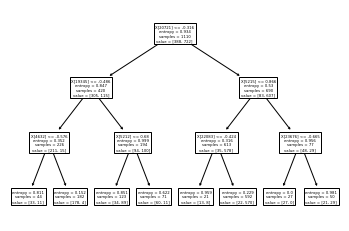

In [10]:
# Making the decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 2)
X_train = pd.DataFrame(X_train, columns=df.columns[ :len(df.columns)-1])

clf = clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
tree.plot_tree(clf)

In [14]:
x = (dict(zip(df.columns[:-1], clf.feature_importances_)))
{k: v for k, v in reversed (sorted(x.items(), key=lambda item: item[1]))}

{'PIAS4': 0.5083854798188292,
 'ACTRT3': 0.15930730579082802,
 'RHBDL3': 0.13275759794969497,
 'EGFEM1P': 0.07280086716950745,
 'U2AF2': 0.061060557330000126,
 'PANX2': 0.03957693775316568,
 'FAM107A': 0.02611125418797449,
 'WASIR1|ENSG00000185203.7': 0.0,
 'WASH6P|ENSG00000182484.10': 0.0,
 'VAMP7|ENSG00000124333.10': 0.0,
 'SPRY3|ENSG00000168939.6': 0.0,
 'IL9R|ENSG00000124334.12': 0.0,
 'VBP1': 0.0,
 'TMLHE': 0.0,
 'SNORA56': 0.0,
 'SNORA36A': 0.0,
 'SMIM9': 0.0,
 'RAB39B': 0.0,
 'MTCP1': 0.0,
 'MPP1': 0.0,
 'H2AFB3': 0.0,
 'H2AFB2': 0.0,
 'H2AFB1': 0.0,
 'GAB3': 0.0,
 'FUNDC2': 0.0,
 'F8': 0.0,
 'F8A3': 0.0,
 'F8A2': 0.0,
 'F8A1': 0.0,
 'DKC1': 0.0,
 'CTAG2': 0.0,
 'CTAG1B': 0.0,
 'CTAG1A': 0.0,
 'CMC4': 0.0,
 'CLIC2': 0.0,
 'BRCC3': 0.0,
 'IKBKG': 0.0,
 'G6PD': 0.0,
 'FAM3A': 0.0,
 'RN7SL742P': 0.0,
 'RN7SL697P': 0.0,
 'SLC10A3': 0.0,
 'UBL4A': 0.0,
 'LAGE3': 0.0,
 'PLXNA3': 0.0,
 'GDI1': 0.0,
 'FAM50A': 0.0,
 'ATP6AP1': 0.0,
 'TAZ': 0.0,
 'DNASE1L1': 0.0,
 'SNORA70|ENSG0000020716